# Random Walk

Aluno: Rômulo Silva Pinheiro

E-mail: romulo.s.pinheiro@gmail.com

# Sumário

<ul>
<li>Introdução</li>
<li>Problema</li>
<li>Implementação</li>
<li>Experimentação</li>
<li>Considerações Finais</li>
</ul>

# Introdução

Este é o exercício da disciplina de TOPICOS ESPECIAIS EM COMPUTAÇÃO - PSO do professor Dr. Claudomiro Sales da Universidade Federal do Pará para alunos de graduação, mestrado e doutorado.

Um Random Walk (passeio aleatório) é um objeto matemático que descreve um caminho que consiste de uma sucessão de passos aleatórios. Por exemplo, o caminho traçado por uma molécula conforme ela viaja em um líquido ou um gás, o caminho de um animal  buscando alimento, comportamento de supercordas, o preço flutuante de ações e da situação financeira de um jogador pode ser aproximada por modelos de passeio aleatório, mesmo que eles possam não ser verdadeiramente aleatórios na realidade.


# Problema

Criar um random walk no Jupyter com a linguagem python, para a tarefa de encontrar uma determinada palavra alvo de número reais. Cada algoritmo deve ser executado 10 vezes e seus gráficos serem feitos em cima das suas estatísticas: média e desvio padrão. Deve ser mostrado o número de acertos médios da palavra alvo, e a avaliação da acurácia e precisão do algoritmo.

Para comparar uma palavra a outra, deve se criar uma população de partículas aleatórias entre 0 e 1, sendo que cada particula deverá ter o mesmo tamanho da palavra alvo.

O Fitness para esse problema será a similaridade entre a palavra alvo e a partícula gerada.

## Parâmetros de Configuração

No início do notebook deve estar os seguintes parâmetros:
<ul>
    <li>Número de partículas</li>
    <li>Número de iterações</li>
    <li>Número de execuções</li>
    <li>Desvio padrão aplicado para modificar a dimensão da partícula (sigma)</li>
    <li>Desvio mínimo entre a melhor partícula e a palavra alvo para a parada do algoritmo</li>
    <li>Palavra alvo a ser encontrada</li>
</ul>

## Palavras a serem encontradas

Serão usados três tamanhos diferentes da palavra no Random Walk:
<ul>
    <li>Os primeiros 10 valores da palavra</li>
    <li>Os primeiros 20 valores da palavra</li>
    <li>A palavra inteira de tamanho 30</li>
</ul>

As partículas do Random Walk devem estar normalizados entre 0 e 1. Elas devem ser desnomalizadas no método Avaliador para a faixa de 50 e 130 gerando a partícula decodificada que será comparada a palavra alvo.

## Funcionamento do Random Walk

Gerar uma população aleatória com 30 partículas e depois com  50 e para cada partícula da população deve-se criar uma nova partícula aplicando uma distribuição Gaussiana a cada uma de suas dimensões, depois comparar a nova partícula criada com a partícula antiga, apenas se for melhor substituir a partícula antiga, e reordenar a população;
Eliminar as 10% piores da população e substituir por partículas aleatórias.

![title](imagens/gaussiana1.png)


## Gráficos

Gerar um gráfico de evolução do RW e Calcular a média e o desvio padrão por geração das R execuções do fitness da melhor partícula.

Avaliar o desvio padrão das soluções finais encontras nas R execuções (precisão)

Fazer um gráfico de barra com a média e desvio padrão de número de acertos de valores da palavra alvo

Avaliar a média e desvio padrão do desvio da palavra encontrada da  alvo (acurácia)

## Precisão
Gráfico de evolução do RW (gráfico no próximo slide)
Calcular a média e o desvio padrão por geração das R execuções do fitness da melhor partícula
Avaliar o desvio padrão das soluções finais encontras nas R execuções (precisão)
Fazer um gráfico de barra com a média e desvio padrão de número de acertos de valores da palavra alvo
Avaliar a média e desvio padrão do desvio da palavra encontrada da  alvo (acurácia)

![image.png](attachment:image.png "Precisão")

## Gráfico de Evolução: Média e Desvio Padrão

Abaixo temos o gráfico modelo que deve ser exibido como saída do programa.

![title](imagens/grafico1.png)

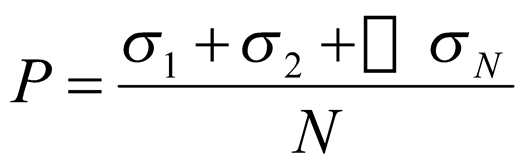

# Implementação

Abaixo segue o código fonte do exercício:



In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import spatial
import statistics 

minimo = 50
maximo = 130
num_pop = 1
num_part = 10

desv_padrao = 0
#palavraalvo = np.array([52.547, 72.154, 53.694, 57.771, 115.88, 105.59, 75.368, 126.02, 52.756, 85.100, 80.525, 111.24, 113.62, 64.95, 89.181, 85.647, 101.71, 106.75, 110.37, 72.082, 104.38, 102.41, 63.009, 59.52, 89.869, 126.78, 77.231, 96.821, 67.905, 110.1])
soma = 0

palavraalvo = np.array([52.547, 72.154])
num_dim = palavraalvo.shape[0] # Isso aqui pega o quantidade de dimensões. É uma propriedade do numpy.

i=0
sigma = 0.3
acerto = 0.95



print("Essa é a palavra alvo que queremos alcançar:\n",palavraalvo)


distancias=[]
distancias2=[]

for i in range(0,num_pop):#for gerando a quantidade  de população
    i+=1
    print("\nPopulação:", i)
    for j in range(0,num_part):#for gerando a quantidade de particulas
        j+=1
        
        #cria de forma randomica numeros entre 0 e 1. vai criar a quantidade definida pela variável num_part
        s = np.random.uniform(0,1, num_dim) #num_dim é o número de dimensões que cada particula vai ter
        
        #equacação que desnormaliza a particula inteira com 30 dimensões
        desnormaliza_part = np.round(minimo+(maximo-minimo)*s,3)
        #print("\nParticula Desnormalizada nº",j,":\n",desnormaliza_part)
        
        #função Fitness usando a distancia Euclidiana fornecida pelo próprio python
        dist1=spatial.distance.euclidean(palavraalvo,desnormaliza_part)
        print("\nDistância Euclidiana 1 nº",j,":",dist1,"\n")
        
        #Para cada partícula da população criar uma nova partícula aplicando uma distribuição Gaussiana a cada uma de suas dimensões
        a = np.around(sigma * np.random.randn(1,num_dim) + desnormaliza_part,3)
        print("Nova distribuição Gaussiana Desnormalizada da partícula",j,"\n",a)

        #função Fitness usando a distancia Euclidiana fornecida pelo próprio python
        dist2=spatial.distance.euclidean(palavraalvo,a)
        print("\nDistância Euclidiana 2 nº",j,":",dist2,"\n")
        
        #adicionando no vetor distancias os vetores desnormaliza_part e a função fitness dist1
        distancias.append([[desnormaliza_part],dist1]) 
        #adicionando no vetor distancias os vetores a e a função fitness dist2
        distancias2.append([[a],dist2])
       
    # Agora tens que comparar as distâncias dos dois vetores e se for melhor substitui.
    #a=[]
    melhor = []
    melhor2 = []
    b=[]
    a1=[]
    for x in range(len(distancias)):
        print("id: {} Partícula: {}, Distância: {}".format(x,distancias[x][0],distancias[x][1]))
        
        print("id: {} Partícula nova: {}, Distância nova: {}".format(x,distancias2[x][0],distancias2[x][1]))
        
        if distancias[x][1] < distancias2[x][1]: #if que compara qual distancia é a menor, usando como base os calculos
            melhor=distancias[x][0]
            a1 = a,melhor
            print("siiimm")
        if distancias[x][1] > distancias2[x][1]: #if que compara qual distancia é a maior, usando como base os calculos afim de exibir o restante que se mantém das partículas
            melhor2=distancias2[x][0]         
            b = a,melhor2
            print("nããooo")
   
    #a1 = np.array([a[:1]])
    a1=a[:1]
    print("\nA nova população com as partículas melhores são:\n",a1,b)
    
    #ver quais do valores de dentro de a1 mais se aproximam da palavra alvo
   
      
    #plt.plot(a1)
    #plt.title('Fitness por geração')
    #plt.xlabel('Gerações')
    #plt.ylabel('Acertos')
    #plt.show 

Essa é a palavra alvo que queremos alcançar:
 [52.547 72.154]

População: 1

Distância Euclidiana 1 nº 1 : 35.38753489577933 

Nova distribuição Gaussiana Desnormalizada da partícula 1 
 [[ 58.72  107.212]]

Distância Euclidiana 2 nº 1 : 35.597321430130116 


Distância Euclidiana 1 nº 2 : 43.43799471660726 

Nova distribuição Gaussiana Desnormalizada da partícula 2 
 [[ 68.389 112.676]]

Distância Euclidiana 2 nº 2 : 43.50863647599176 


Distância Euclidiana 1 nº 3 : 39.93343506386598 

Nova distribuição Gaussiana Desnormalizada da partícula 3 
 [[ 81.221 100.331]]

Distância Euclidiana 2 nº 3 : 40.20126372391794 


Distância Euclidiana 1 nº 4 : 35.218618783251564 

Nova distribuição Gaussiana Desnormalizada da partícula 4 
 [[86.474 82.898]]

Distância Euclidiana 2 nº 4 : 35.58756615729713 


Distância Euclidiana 1 nº 5 : 50.40671480070885 

Nova distribuição Gaussiana Desnormalizada da partícula 5 
 [[102.672  78.648]]

Distância Euclidiana 2 nº 5 : 50.543918140563655 


Distância Eu

## Experimentação

In [94]:
palavraalvo[:] - a1[:0]

array([], shape=(0, 1, 2), dtype=object)

In [83]:
a1

array([[[((((((((array([[ 75.47 , 114.196]]), [array([ 75.003, 124.534])]), [array([[54.158, 81.898]])]), [array([ 73.578, 110.216])]), [array([ 93.794, 113.497])]), [array([84.255, 72.012])]), [array([121.725, 108.089])]), [array([[ 67.456, 110.668]])]), [array([[62.306, 66.03 ]])]),
         list([array([120.131, 110.951])])]]], dtype=object)

In [62]:
a1.shape

AttributeError: 'list' object has no attribute 'shape'